In [59]:
import duckdb
file = "C:/Users/manat/Documents/Projects/mtlBiodiversity/data/db/mtlbio.duckdb"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [60]:
con = duckdb.connect(file)
df = con.execute("SELECT * from grid_sjoin").df()

#df.head()

In [61]:

orgs = df.publishingOrgKey.unique()
#print(orgs)
mapping = { 'da86174a-a605-43a4-a5e8-53d484152cd3': 'plantNet',
            'b6d09100-919d-4026-b35b-22be3dae7156' : 'ebutterfly',
            '28eb1a3f-1c15-4a95-931a-4af90ecb574d' : 'inat'
    }
df['orgs'] = df['publishingOrgKey'].map(mapping)
df.head(2)

,gbifID,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,...,publishingOrgKey,coordinateUncertaintyInMeters,coordinatePrecision,grid_id,minx,miny,maxx,maxy,geom,orgs
0,3998494771,q-10688069538,Plantae,Tracheophyta,Magnoliopsida,Apiales,Araliaceae,Aralia,Aralia racemosa,SPECIES,...,da86174a-a605-43a4-a5e8-53d484152cd3,7.0,None,1098.0,-73.957862,45.430894,-73.955268,45.432470,"[2, 4, 0, 0, 0, 0, 0, 0, 109, 234, 147, 194, 6...",plantNet
1,3960185358,q-10623459328,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rhamnaceae,Rhamnus,Rhamnus cathartica,SPECIES,...,da86174a-a605-43a4-a5e8-53d484152cd3,31.0,None,1277.0,-73.955917,45.441137,-73.953323,45.442713,"[2, 4, 0, 0, 0, 0, 0, 0, 110, 233, 147, 194, 1...",plantNet


In [ ]:
df_d = df[["orgs", "coordinateUncertaintyInMeters"]].copy()
df_d.head(2)

,orgs,coordinateUncertaintyInMeters
0,plantNet,7.0
1,plantNet,31.0
2,plantNet,NaN
3,plantNet,98.0
4,plantNet,44.0
...,...,...
204137,ebutterfly,1000.0
204138,ebutterfly,NaN
204139,ebutterfly,NaN
204140,ebutterfly,NaN


In [73]:
df_d.groupby('orgs').describe()

coordinateUncertaintyInMeters                                   \
                                   count          mean           std  min   
orgs                                                                        
ebutterfly                        3603.0  11679.275604  90922.802732  1.0   
inat                            170255.0   1387.021902  39373.104101  1.0   
plantNet                          4592.0     76.006969    605.508404  1.0   

                                               
              25%     50%      75%        max  
orgs                                           
ebutterfly  500.0  1000.0  10000.0  1500000.0  
inat          8.0    31.0    184.0  8200985.0  
plantNet      9.0    15.0     35.0    23667.0

In [63]:
#df.describe(exclude=[np.number])

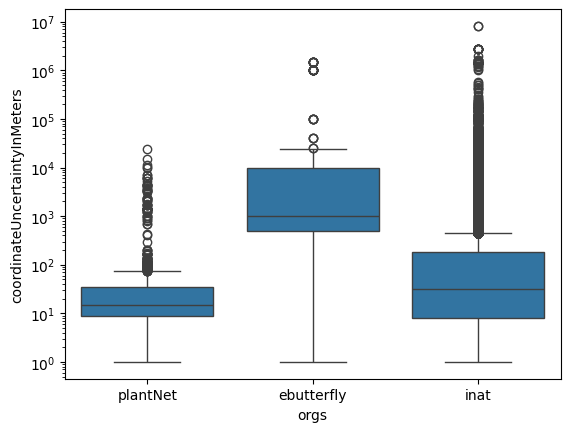

In [68]:
sns.boxplot(df, x = df.orgs,y = df.coordinateUncertaintyInMeters)
plt.yscale('log')
#df.coordinateUncertaintyInMeters.median

In [65]:
df_issues = df.groupby(['grid_id']).agg(issue_count = ('issue', 'nunique'),
                                        species_richness = ('species', 'nunique'),
                                        coordinateUncertaintyMax = ('coordinateUncertaintyInMeters', 'max'),
                                        coordinateUncertaintyMean = ('coordinateUncertaintyInMeters', 'mean'),
                                        coord_precision_max = ('coordinatePrecision', 'max' ),
                                        coord_precision_min = ('coordinatePrecision', 'min' ),
                                        coord_precision_mean = ('coordinatePrecision', 'mean' )
                                    
                                        
                                        ).sort_values(by = 'species_richness', ascending= False)
df_issues.head(2)
#df_issues.describe()

,issue_count,species_richness,coordinateUncertaintyMax,coordinateUncertaintyMean,coord_precision_max,coord_precision_min,coord_precision_mean
grid_id,,,,,,,
34294.0,5,489,235.0,13.148810,NaN,NaN,NaN
44592.0,3,415,793.0,753.161782,NaN,NaN,NaN


In [66]:
df_orgs = df.groupby(['grid_id']).agg(orgs = ('publishingOrgKey', pd.Series.mode))
df_orgs.head()


,orgs
grid_id,
171.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
174.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
176.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
180.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
181.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d


In [67]:
df1 = df_issues.merge(df_orgs, on = 'grid_id')
df1.head()

,issue_count,species_richness,coordinateUncertaintyMax,coordinateUncertaintyMean,coord_precision_max,coord_precision_min,coord_precision_mean,orgs
grid_id,,,,,,,,
34294.0,5,489,235.0,13.148810,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
44592.0,3,415,793.0,753.161782,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
7152.0,6,374,27158.0,1750.381443,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
28055.0,5,369,44306.0,42.814788,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
36027.0,4,365,129359.0,116.505249,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
